- Angela Tong 2022-4-19
- Coursera course: machine learning with python by IBM
  - week2 regression
  - 2-4 non-linear regression
- Dataset: "china_gdp.csv"

## Objectives

After completing this lab you will be able to:

*   Differentiate between linear and non-linear regression
*   Use non-linear regression model in Python

# Non-linear regression analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## cubic
$$ Y= X^3+X^2+X+3 $$

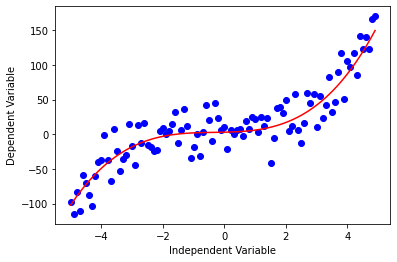

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20* np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Quadtratic
$$ Y= X^2$$

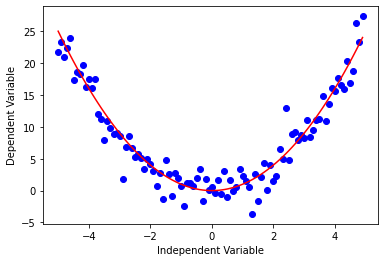

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

y = x**2
y_noise = 2* np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Exponetial
An exponential function with base c is defined by 
$$ Y = a + b c^X$$ 
where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable.


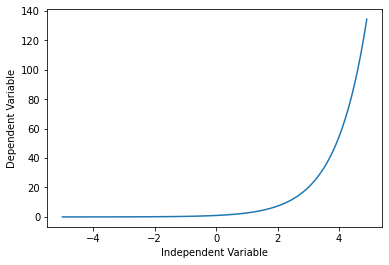

In [4]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y = np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Logarithmic

The response $y$ is a results of applying the logarithmic map from the input $x$ to the output $y$. It is one of the simplest form of **log()**: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be a polynomial representation of the $x$ values. In general form it would be written as\
\begin{equation}
y = \log(X)
\end{equation}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


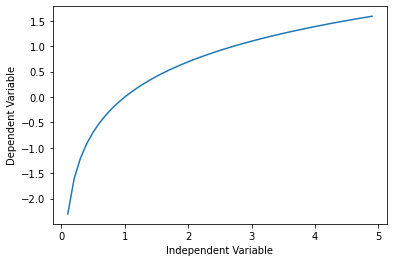

In [5]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Sigmoidal/Logistic
$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$



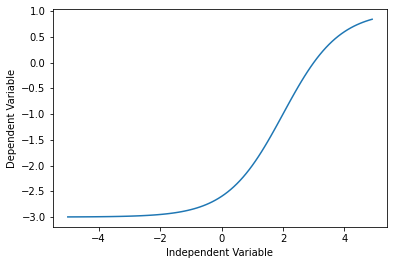

In [6]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Non-linear regression example

For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.

In [7]:
import numpy as np
import pandas as pd

## Data

In [8]:
df = pd.read_csv("/content/china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


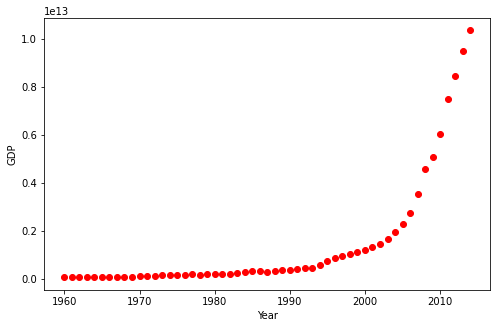

In [9]:
# plot data
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.


In [10]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

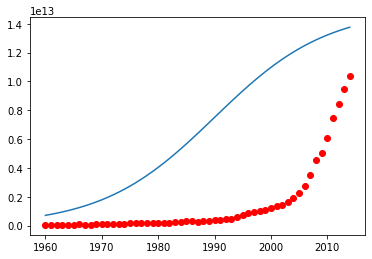

In [11]:
# sample sigmoid line
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [12]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

**How we find the best parameters for our fit line?**

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, \*popt) - ydata is minimized.

popt are our optimized parameters.

In [13]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453019, beta_2 = 0.997207


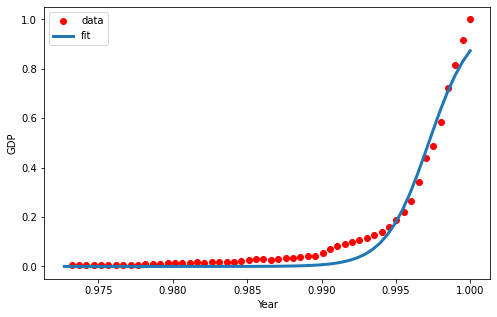

In [14]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Evaluation

In [15]:

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


df = pd.read_csv("/content/china_gdp.csv")

# split data
msk = np.random.rand(len(df)) < 0.8
x_train = xdata[msk]
x_test = xdata[~msk]
y_train = ydata[msk]
y_test = ydata[~msk]

# model
popt, pcov = curve_fit(sigmoid, x_train, y_train)
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

# prediction
y_predict = sigmoid(x_test, *popt)

# evaluation
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - y_predict) ** 2))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predict - y_test)))
print("R2-score: %.2f" % r2_score(y_test,y_predict ) )

beta_1 = 732.315356, beta_2 = 0.997276
Residual sum of squares (MSE): 0.00
Mean absolute error: 0.03
R2-score: 0.98
